In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # statsmodels  

In [2]:
df =  pd.read_csv("AirPassengers.csv", index_col=0)
df.head()


,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
df.index 

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.index 

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

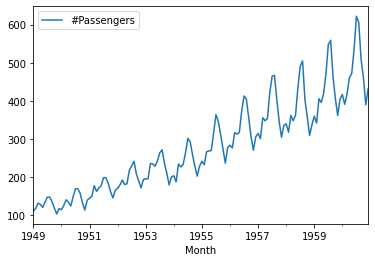

In [6]:
df.plot()

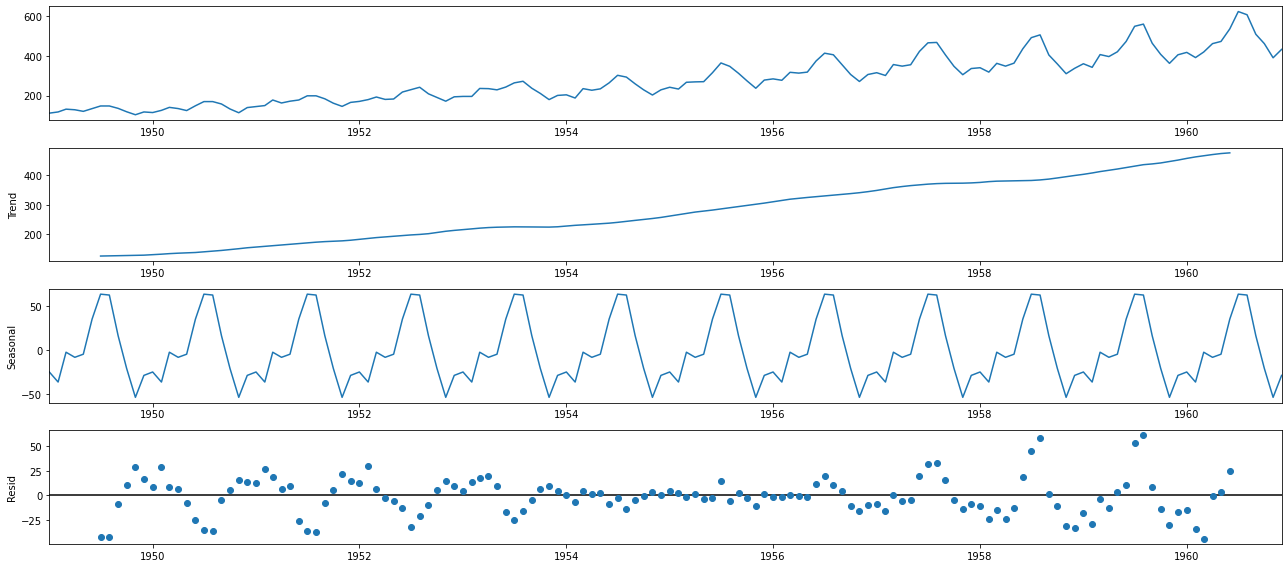

In [7]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

SIMPLE MOVING AVERAGE

In [14]:
df_ma = df.copy()

# windows function 

# rolling 
df_ma['SMA_4'] = df_ma['#Passengers'].rolling(window = 4).mean()
df_ma['SMA_6'] = df_ma['#Passengers'].rolling(window = 6).mean()
df_ma['SMA_8'] = df_ma['#Passengers'].rolling(window = 8).mean()
df_ma['SMA_12'] = df_ma['#Passengers'].rolling(window = 12).mean()

df_ma.head(20)

,#Passengers,SMA_4,SMA_6,SMA_8,SMA_12
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN,NaN
1949-04-01,129,122.75,NaN,NaN,NaN
1949-05-01,121,125.00,NaN,NaN,NaN
1949-06-01,135,129.25,124.500000,NaN,NaN
1949-07-01,148,133.25,130.500000,NaN,NaN
1949-08-01,148,138.00,135.500000,130.375,NaN
1949-09-01,136,141.75,136.166667,133.375,NaN


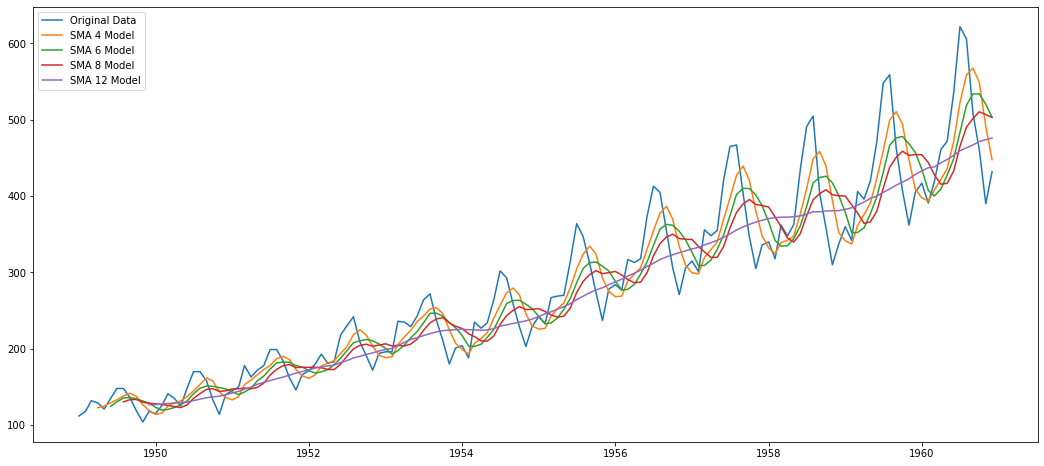

In [15]:
plt.plot(df_ma['#Passengers'], label = 'Original Data')
plt.plot(df_ma['SMA_4'], label = "SMA 4 Model")
plt.plot(df_ma['SMA_6'], label = "SMA 6 Model")
plt.plot(df_ma['SMA_8'], label = "SMA 8 Model")
plt.plot(df_ma['SMA_12'], label = "SMA 12 Model")

plt.legend()

In [10]:

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100


In [16]:
mape(df_ma['#Passengers'], df_ma['SMA_4'])

9.187719963528176

In [17]:
mape(df_ma['#Passengers'], df_ma['SMA_6'])

11.610217609232771

In [18]:
mape(df_ma['#Passengers'], df_ma['SMA_8'])

12.513798936616883

In [19]:
mape(df_ma['#Passengers'], df_ma['SMA_12'])

10.778519137583197